# Understanding origins

## Executive summary

Has an obsidian notebook

## Config

In [70]:
import matplotlib.pyplot as  plt
import numpy as np
import pandas as pd
# import seaborn as sns
import sys

sys.path.append('c:\\Users\\Jordi Cremades\\Documents\\Repos\\central-node')

# from utils import dataset_meta_stats
# from utils import dataset_stats
from utils import query_engines

# dms = dataset_meta_stats.DatasetMetaStats() 
# ds = dataset_stats.DatasetStats()

## [X] Task 1: Develop query

In [43]:
START_PREVIOUS_TO_CURRENT_DATE = 30
END_PREVIOUS_TO_CURRENT_DATE = 1
    
params = [
    {'name':'start_previous_to_current_date', 'value': str(START_PREVIOUS_TO_CURRENT_DATE)},
    {'name':'end_previous_to_current_date', 'value': str(END_PREVIOUS_TO_CURRENT_DATE)}
]

q = query_engines.QueryEngines(
    query='store_accessed_origin.sql',
    params=params,
    printq=None
)

df = q.query_run_starbust()

c:\Users\Jordi Cremades\Documents\Repos\central-node\utils\query_engines.py:162: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/f5341fc689ac369a2426e984820eff4da8e82cefd29d146d66afcbf678920bf5


In [49]:
df['w_events_qc'] = 100*df['events_qc']/df['events_qc'].sum()
df['w_events_not_qc'] = 100*df['events_not_qc']/df['events_not_qc'].sum()

df.sort_values(by='w_events_qc', ascending=False, inplace=True)

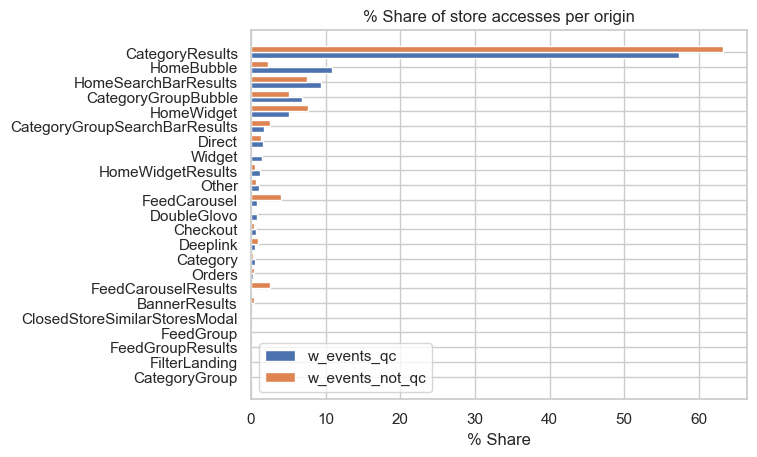

In [79]:
# Sort DataFrame by 'w_events_qc' column
df.sort_values(by='w_events_qc', ascending=True, inplace=True)

# Set the width of each bar
bar_width = 0.4

# Generate an array of indices for the x-axis positions
x_indices = np.arange(len(df))

# Plot the first series
plt.barh(x_indices - bar_width/2, df['w_events_qc'], height=bar_width, label='w_events_qc')

# Plot the second series
plt.barh(x_indices + bar_width/2, df['w_events_not_qc'], height=bar_width, label='w_events_not_qc')

# Set the ticks and labels for the x-axis
plt.yticks(x_indices, df['origin'])

plt.title('% Share of store accesses per origin')
plt.xlabel('% Share')
plt.legend()
plt.grid(True, axis='x')

plt.show()


## [X] Task 2: Definitions for each event

In [81]:
df.to_csv('events_definitions.csv')